# Assignment 3 - OPTION A (PROGRAMMING): Machine Learning


## Group member
1. Pham Hoang Duong - s3818206
2. Tran Dang Khoi - s4015143
3. Nguyen Anh Tung - s4045602

## Introduction
In this assignment, our group will implement a comprehensive machine learning pipeline to gain hands-on experience with various stages of a machine learning project. The primary objective is to work through the entire process, from data acquisition to model evaluation and tuning, using a dataset that meets specific requirements.

## Objectives
1. Data Exploration <br/><br/>
2. Data Preprocessing <br/><br/>
3. Model Training and Evaluation<br/><br/>
4. Hyperparameter Tuning<br/><br/>
5. Model Testing and Analysis<br/><br/>

## Import Neccesary library

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import OneHotEncoder      
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from statistics import mean
import joblib

## Data Exploration
We begin by loading the dataset, exploring its structure using descriptive statistics, and visualizing relationships between different features to understand the data better.

### 1. Load the Dataset

In [5]:
# Load dataset
raw_data = pd.read_csv('housing.csv')

### 2. Exploration the Dataset

In [32]:
# Summary statistics
raw_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [34]:
# Display the first few rows
raw_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [35]:
# Check for null values
raw_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

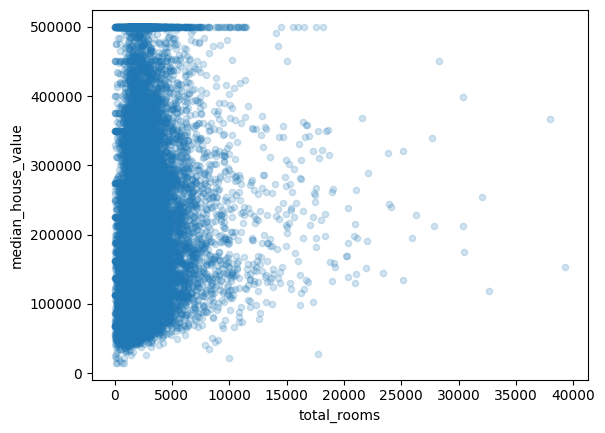

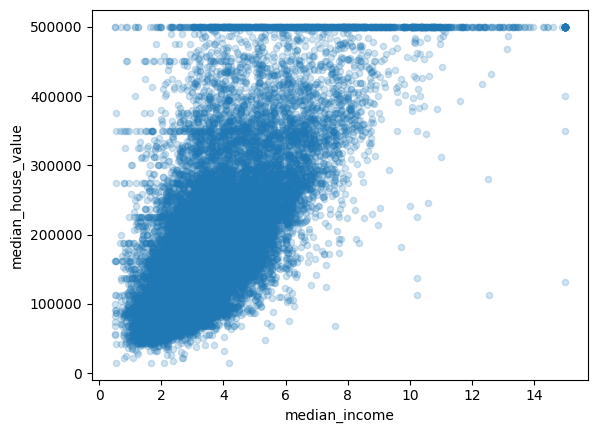

In [36]:
# Scatter plot b/w 2 features
raw_data.plot(kind="scatter", y="median_house_value", x="total_rooms", alpha=0.2)
plt.savefig('figures/scatter_1_feat.png', format='png', dpi=300)
plt.show()      

raw_data.plot(kind="scatter", y="median_house_value", x="median_income", alpha=0.2)
plt.savefig('figures/scatter_2_feat.png', format='png', dpi=300)
plt.show()

In [ ]:
# Boxplot to detect outliers in a numerical feature
sns.boxplot(x=raw_data['total_bedrooms'])
plt.show()
sns.boxplot(x=raw_data['population'])
plt.show()

In [37]:
# Find correlation between 2 columns
correlation = raw_data['population'].corr(raw_data['households'])
print(f'Correlation between population and households: {correlation}')

Correlation between Column1 and Column2: 0.9071859001744987


In [ ]:
# Scatter plot b/w every pair of features
from pandas.plotting import scatter_matrix   
features_to_plot = ["median_house_value", "total_rooms", "housing_median_age", "households"]
scatter_matrix(raw_data[features_to_plot], figsize=(12, 8))
plt.savefig('figures/scatter_mat_all_feat.png', format='png', dpi=300)
plt.show()

In [ ]:
# Show scatter plot of 2 features
plt.figure(figsize=(10, 6))
plt.scatter(raw_data['population'], raw_data['households'])
plt.xlabel('population')
plt.ylabel('households')
plt.title('Scatter Plot of population vs households')
plt.savefig('figures/scatter_plot_population_vs_households.png', format='png', dpi=300)
plt.show()

# Optional: Regression plot using seaborn
sns.lmplot(x='population', y='households', data=raw_data)
plt.title('Regression Plot of population vs households')
plt.savefig('figures/regression_plot_population_vs_households.png', format='png', dpi=300)
plt.show()

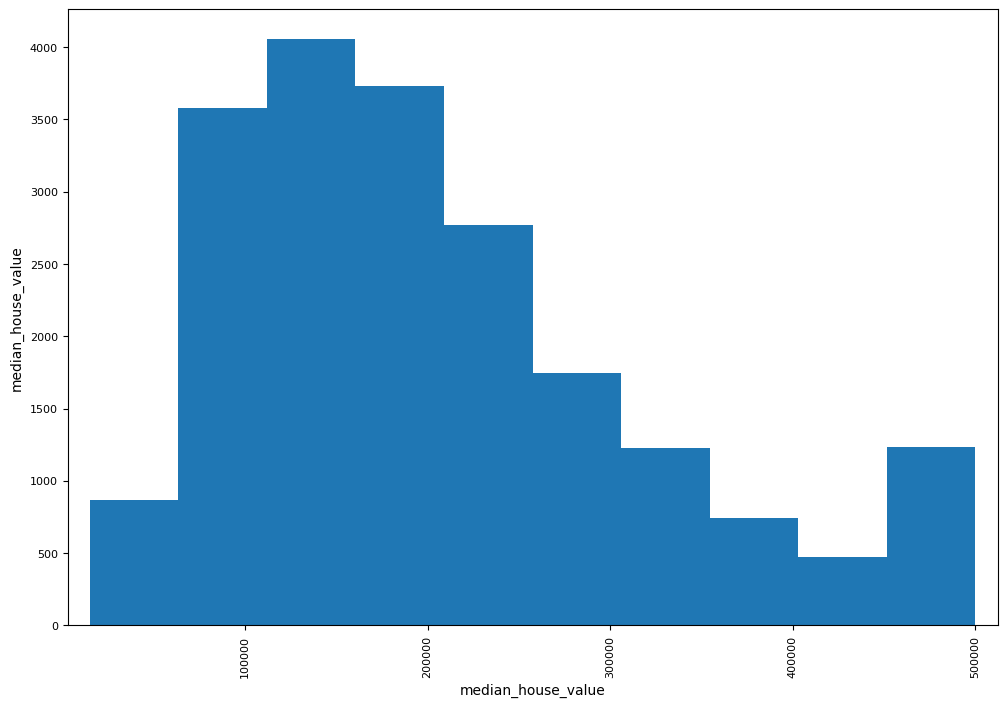

In [38]:
# Plot histogram of 1 feature
from pandas.plotting import scatter_matrix   
features_to_plot = ["median_house_value"]
scatter_matrix(raw_data[features_to_plot], figsize=(12, 8))
plt.show()

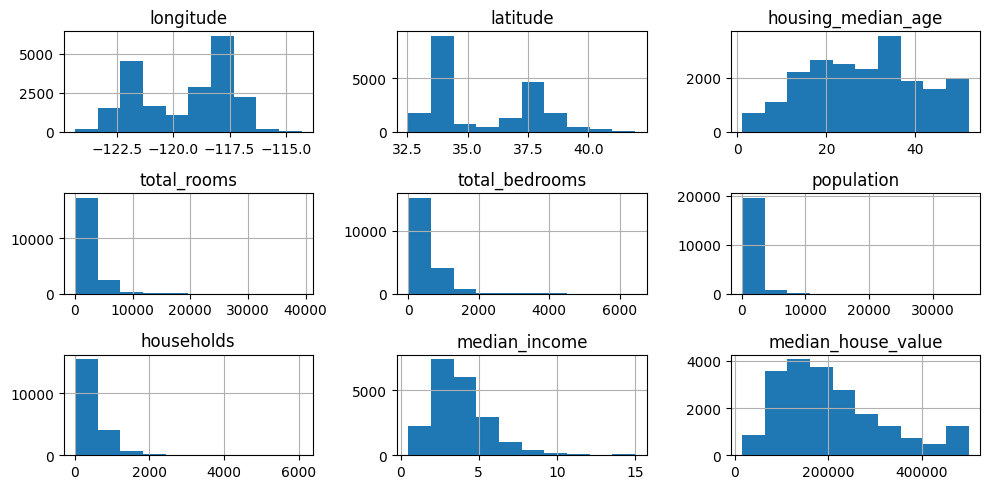

In [39]:
# Plot histogram of numeric features
raw_data.hist(figsize=(10,5))
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.tight_layout()
plt.savefig('figures/hist_raw_data.png', format='png', dpi=300)
plt.show()

In [ ]:
# Remove rows with null values
raw_data.dropna(inplace=True)
raw_data.isnull().sum()

In [ ]:
# One-hot encoding for 'ocean_proximity'
raw_data_encoded = pd.get_dummies(raw_data, columns=['ocean_proximity'])

In [58]:

# Separate Features (X) and Target (y)
X = raw_data_encoded.drop('median_house_value', axis=1)
y = raw_data_encoded['median_house_value']

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

processed_train_set_val = X_train
train_set_labels = y_train
processed_test_set = X_test
test_set_labels = y_test

Training features shape: (16346, 13)
Testing features shape: (4087, 13)
Training labels shape: (16346,)
Testing labels shape: (4087,)


## Model Training and Evaluation

We will train four machine learning models and evaluate their performance on the training data. The models we will use are:

- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- Gradient Boosting Regressor

In [ ]:
raw_data.drop(columns = ["longitude", "latitude"], inplace=True)

In [59]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score


corr_matrix = raw_data.corr(numeric_only=True)
print('\n', corr_matrix["median_house_value"].sort_values(ascending=False))
raw_data["rooms_per_household"] = raw_data["total_rooms"] / raw_data["households"]
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(raw_data, test_size=0.2, random_state=42)
num_feat_names = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
cat_feat_names = ['ocean_proximity']


def train_evaluate_model(model, X_train, y_train, X_test, y_test, cross_val=True):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)
    
    # Print evaluation metrics
    print(f"\nModel: {type(model).__name__}")
    print(f"Training RMSE: {train_rmse:.2f}, R²: {train_r2:.2f}")
    print(f"Test RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}")
    
    # Perform Cross-validation if set to True
    if cross_val:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
        cv_rmse_scores = np.sqrt(-cv_scores)
        print(f"Cross-Validation RMSE: {cv_rmse_scores}")
        print(f"Average CV RMSE: {cv_rmse_scores.mean():.2f}")
    
    return model

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Assume processed_train_set_val, train_set_labels, processed_test_set, test_set_labels are defined
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=100),
    GradientBoostingRegressor(n_estimators=100)
]

for model in models:
    trained_model = train_evaluate_model(
        model, processed_train_set_val, train_set_labels, processed_test_set, test_set_labels
    )

from sklearn.model_selection import KFold, cross_val_score

def kfold_cross_validation(model, X_train, y_train, k=5):
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring="neg_mean_squared_error")
    rmse_scores = np.sqrt(-scores)
    print(f"Cross-Validation RMSE Scores: {rmse_scores}")
    print(f"Average Cross-Validation RMSE: {rmse_scores.mean():.2f}")
    return rmse_scores

# Example with RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
kfold_cross_validation(rf_model, processed_train_set_val, train_set_labels, k=5)


from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_distributions = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Randomized search on RandomForestRegressor
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=param_distributions,
    n_iter=20,  # Number of iterations
    cv=5,       # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1   # Use all processors
)

# Fit the randomized search model
rf_random_search.fit(processed_train_set_val, train_set_labels)

# Print the best parameters and the best score
print(f"Best Params: {rf_random_search.best_params_}")
print(f"Best Score: {rf_random_search.best_score_:.4f}")



 median_house_value     1.000000
median_income          0.688355
rooms_per_household    0.151344
total_rooms            0.133294
housing_median_age     0.106432
households             0.064894
total_bedrooms         0.049686
population            -0.025300
Name: median_house_value, dtype: float64

Model: LinearRegression
Training RMSE: 68487.31, R²: 0.65
Test RMSE: 69297.72, R²: 0.65
Cross-Validation RMSE: [64521.46313051 70550.60960928 67275.29148124 72732.68266626
 68608.76157199]
Average CV RMSE: 68737.76

Model: DecisionTreeRegressor
Training RMSE: 0.00, R²: 1.00
Test RMSE: 67723.09, R²: 0.66
Cross-Validation RMSE: [67088.28306648 71648.23233932 67226.16266753 68761.81553678
 71307.55035034]
Average CV RMSE: 69206.41

Model: RandomForestRegressor
Training RMSE: 18141.84, R²: 0.98
Test RMSE: 48877.50, R²: 0.83
Cross-Validation RMSE: [46451.20434615 52308.1706547  47753.40067278 49652.95736976
 50201.04682128]
Average CV RMSE: 49273.36

Model: GradientBoostingRegressor
Training RMSE

c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Params: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}
Best Score: 0.8176


## Hyperparameter Tuning
Next, we use random search to fine-tune hyperparameters for the best-performing model.

Use random search to fine-tune hyperparameters for the best-performing model.

In [60]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized search for Random Forest
rf_random = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=param_grid, n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {rf_random.best_params_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 30}


## Model Testing and Analysis

Test the tuned model on the test set and analyze its performance.

In [63]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

def test_and_analyze_model(model, X_train, y_train, X_test, y_test):
    # Fit the model on the entire training set
    model.fit(X_train, y_train)
    
    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)
    
    # Print metrics
    print(f"Training RMSE: {train_rmse:.2f}, MAE: {train_mae:.2f}, R²: {train_r2:.2f}")
    print(f"Test RMSE: {test_rmse:.2f}, MAE: {test_mae:.2f}, R²: {test_r2:.2f}")
    
    return test_predictions

# Assuming best_rf_model is the model after tuning
test_predictions = test_and_analyze_model(
    rf_random.best_estimator_,  # Model with best parameters
    processed_train_set_val, 
    train_set_labels, 
    processed_test_set, 
    test_set_labels
)

Training RMSE: 24531.79, MAE: 14975.76, R²: 0.95
Test RMSE: 48549.18, MAE: 31522.30, R²: 0.83


## Team Contribution

| Student ID | Student Name | Contribution Rate (1-100%) | Responsible for (Parts, Cells...) | Note |
|------------|--------------|----------------------------|------------------------------------|------|
| s3818206| Pham Hoang Duong | 50%| All|      |
|s4015143 | Tran Dang Khoi | 50%| All|      |
|s4045602|Nguyen Anh Tung|0%|        |No contribution to the asignment|